<a href="https://colab.research.google.com/github/RatnaWijiLestari/CRISP-DM-Methodology/blob/main/EDA/Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#Pandas show all column
pd.set_option('display.max_columns',200)

In [ ]:
df=pd.read_csv("Telco churn.csv")


Data understanding : untuk memahami data set yang akan diproses , mengetahui informasi yang ada dalam data , mengetahui konten dan lokasi data, serta mengetahui data dictionary dan metadata

In [ ]:
#mengetahui jumlah column dan row

df.shape

(7043, 21)

In [ ]:
#mengetahui nama-nama kolom dalam bentuk list
list(df.columns)

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [ ]:
#mengetahui info dalam dataframe seperti ada null atau tidak, tipe data setiap kolom ,dll

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Dapat dilihat bahwa tidak ada NaN pada dataframe karena jumlah value non-null pada setiap kolom = total row sehingga tidak perlu dilakukan drop kolom/row yang terdapat NaN ataupun mengisi NaN value dengan Mean (jika berdistribusi normal)/Median (jika tidak berdistribusi normal.

Terdapat column customerID yang tidak diperlukan dalam analisis karena tidak mempengaruhi apapun dalam analisis sehingga perlu di drop

In [ ]:
#mengetahui jumlah kolom
len(df.columns)

21

In [ ]:
#menghilangkan colom customerID karena tidak digunakan dalam analisis
df=df.drop('customerID', axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Dapat dilihat dari df.info() terdapat tipe data yang tidak sesuai pada kolom SeniorCitizen dan TotalCharges sehingga harus diubah

In [ ]:
#Mengubah tipe data pada kolom SrniorCitizen menjadi object
df['SeniorCitizen']=df['SeniorCitizen'].astype('O')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
#Mengubah tipe data pada kolom TotalCharges menjadi float dengan menggunakan pd.to_numeric
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Statistical Summary

In [ ]:
#Memisahkan kolom categorical dan numerical
#mengeluarkan Churn pada categorical karena merupakan target dari analisis
cats=[i for i in df.columns if df[i].dtype=='object' and i !='Churn']
nums=[i for i in df.columns if df[i].dtype!='object']


NameError: ignored

In [ ]:
cats

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [ ]:
nums

['tenure', 'MonthlyCharges', 'TotalCharges']

In [ ]:
#Mengetahui berapa unique pada kolom categorical dan jumlah masing-masing unique
for col in cats:
  print(df[col].value_counts())
  print()

Male      3555
Female    3488
Name: gender, dtype: int64

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

No     3641
Yes    3402
Name: Partner, dtype: int64

No     4933
Yes    2110
Name: Dependents, dtype: int64

Yes    6361
No      682
Name: PhoneService, dtype: int64

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

No                     2810
Yes     

Terlihat bahwa unique yang terdapat pada setiap kolom sudah sesuai dan tidak ada data yang inconsistent

##Pendekatan Numerik

In [ ]:
#Mengetahui statistik setiap kolom nums
#menggunakan transpose untuk mentranspose tabel dalam bentuk horizontal
df[nums].describe().T


,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


-Kolom tenure berdistribusi right skew karena mean>median

-Kolom MonthlyCharges berdistribusi left skew karena mean<median

-Kolom TotalCharges berdistribusi right skew karena mean>median

-Tidak ada outlier karena nilai max masih dalam batas wajar

##Pendekatan Categoric

In [ ]:
#Mengetahui unique dengan freq terbanyak
df[cats].describe().T

,count,unique,top,freq
gender,7043,2,Male,3555
SeniorCitizen,7043,2,0,5901
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


Terlihat bahwa terdapat ketimpangan pada kolom PhoneService karena unique "Yes" memiliki freq yang sangat jauh dengan "No"

##Univariate Analysis

In [ ]:

df[nums].head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


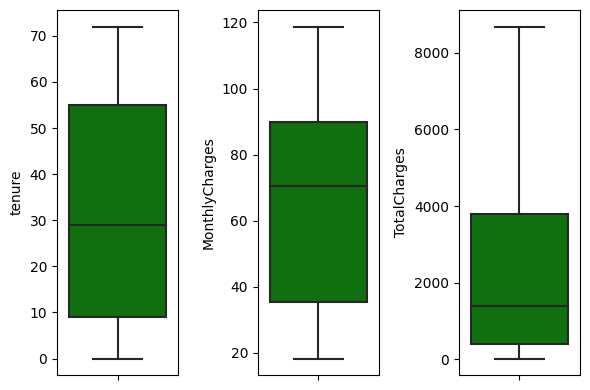

In [ ]:
#membuat grafik dengan plt.figure dengan ukuran 6×4
plt.figure(figsize=(6,4))
#membuat loop dari 0 sampai banyaknya kolom nums
for i in range(0,len(nums)):
  #menggunakan plt.subplot(1,3, i+1) artinya dalam 1 baris ada 3 gambar dengan i+1 sebagai index dari masing-masing kolom nums
  plt.subplot(1,3,i+1)
  #Membuat boxplot dengan sumbu vertikalnya df[nums[i]]
  sns.boxplot(y=df[nums[i]],color='green',orient='v')
#Merapatkan visualisasi
plt.tight_layout()

Dari keseluruhan data customer dapat dilihat bahwa tenure nya berdistribusi paling banyak antara 10-55 dan tenure paling lama pada 71. Sedangkan median nya pada 30 th

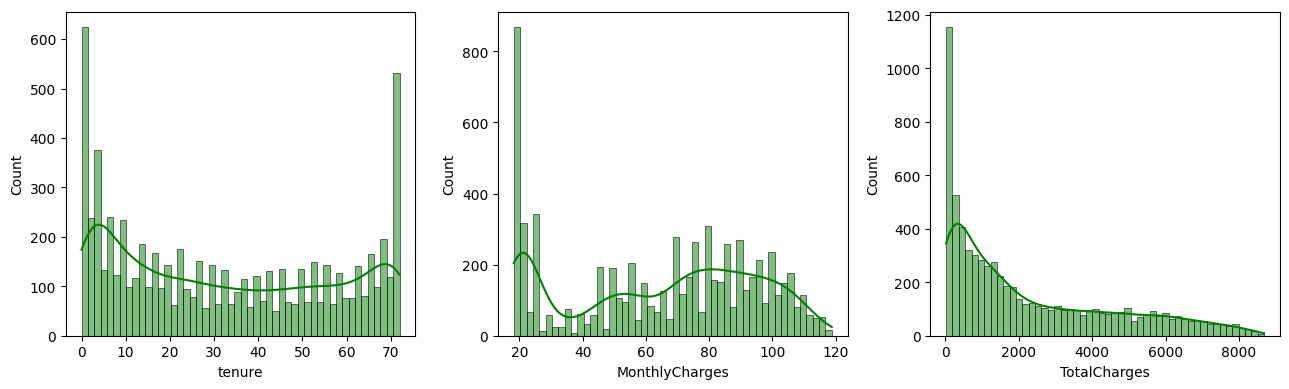

In [ ]:
plt.figure(figsize=(13,4))
#Membuat loop dari 0 sampai banyaknya kolom nums
#Menggunakan kde untuk memunculkan garis pada histogram
#Menggunakan bins untuk membuat tampilan kotak histogram lebih kecil sehingga lebih terlihat distribusinya
for i in range(0,len(nums)):
  plt.subplot(1,3,i+1)
  sns.histplot(df[nums[i]],color='green',kde=True,bins=50)
plt.tight_layout()

Terlihat bahwa TotalCharges berdistribusi right skew ,mean>median

Penggunaan histplot sebenarnya untuk melihat freq dari value pada suatu kolom sedangkan untuk melihat distribusinya lebih mudah menggunakan distplot

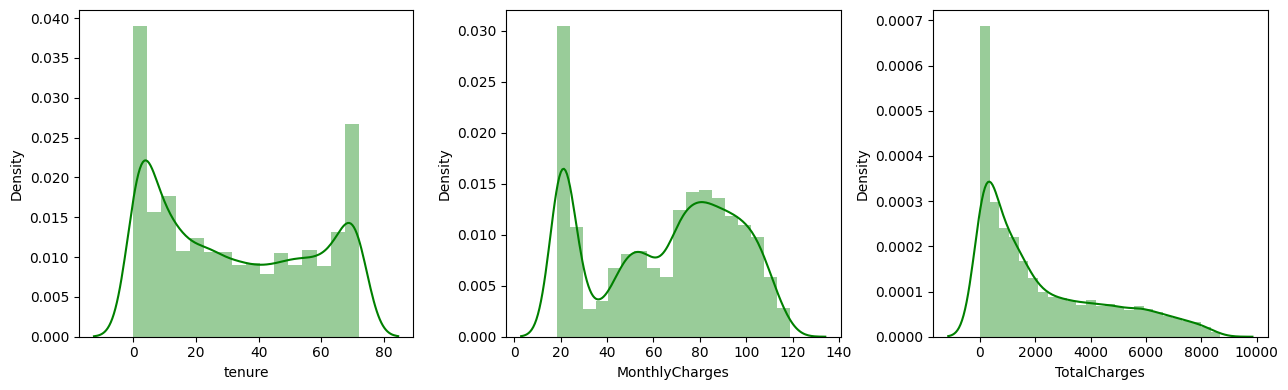

In [ ]:
plt.figure(figsize=(13,4))
for i in range(0,len(nums)):
  plt.subplot(1,3,i+1)
  sns.distplot(df[nums[i]],color='green')
plt.tight_layout()

##Countplot

In [ ]:
df[cats].head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [ ]:
len(cats)

16

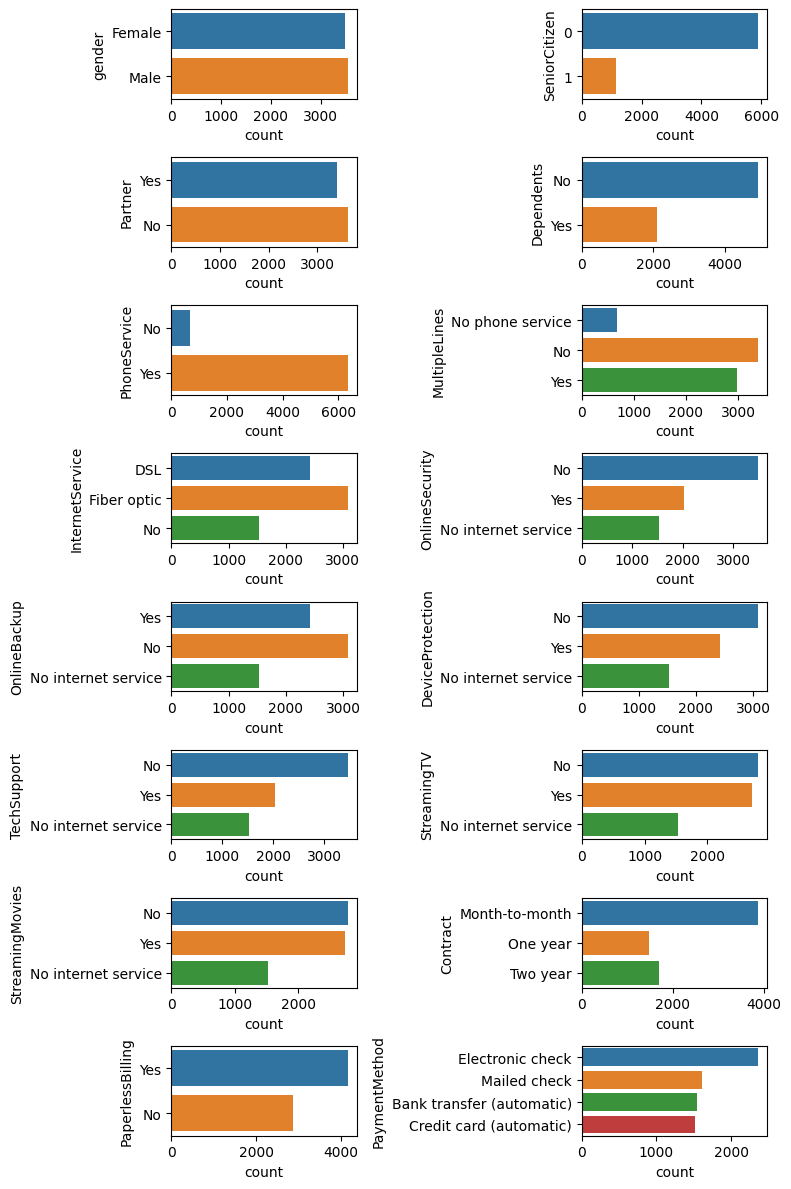

In [ ]:
#Membuat countplot dengan loop dari 0 sampai banyaknya kolom cats
#karena banyaknya kolom cats ada 16 maka dibuat plt.subplot(8,2,i+1) artinya terdapat 8 baris dengan tiap baris ada 2 gambar dengan index i+1
plt.figure(figsize=(8,12))
for i in range(0,len(cats)):
  plt.subplot(8,2,i+1)
  sns.countplot(y=df[cats[i]],orient='v')
plt.tight_layout()

Dari membaca countplot ini dapat menarik beberapa insight seperti

1. pada kolom PaymentMethod terbanyak adalah Elektronic check sehingga perusahaan harus memfokuskan pada metode pembayaran tersebut

2. Pada kolom contract paling banyak adalah month to month. Perusahaan harus mencari cara agar customer yang contract nya month to month ini berpindah ke one year/ two year agar meningkatkan provit perusahaan

##Bivariate Analysis

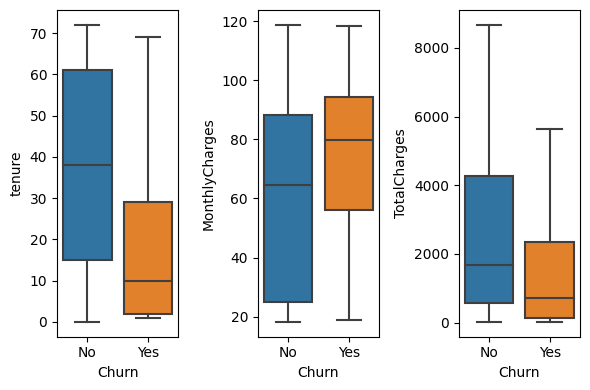

In [ ]:
plt.figure(figsize=(6,4))
#Membuat loop dari 0 sampai banyaknya kolom nums
#membuat boxplot untuk membandingkan 2 variabel
#karena fokusnya untuk membandingkan variabel pada kolom nums dengan variabel churn maka outliers bisa dihilangkan dengan showfliers=False
for i in range(0,len(nums)):
  plt.subplot(1,3,i+1)
  sns.boxplot(y=df[nums[i]], x=df['Churn'],orient='v',showfliers=False)
plt.tight_layout()

-Terlihat bahwa customer yang churn biasanya tenure lebih pendek yaitu hanya sekitar 4-29 dengan median 10. Sedangkan customer yang tenure lebih lama yaitu 30 ke atas dengan median 39 cenderung lebih royal dan tidak churn

-Terlihat bahwa customer yang churn biasanya mengeluarkan monthly charges lebih banyak yaitu sekitar 60 keatas dengan median 80. Sedangkan customer yang mengeluarkan monthly charges lebih sedikit yaitu dengan median 65 cenderung tidak churn

-Terlihat bahwa customer yang tidak churn totalcharges nya terdistribusi lebih merata/lebih luas dibandingkan customer yang churn

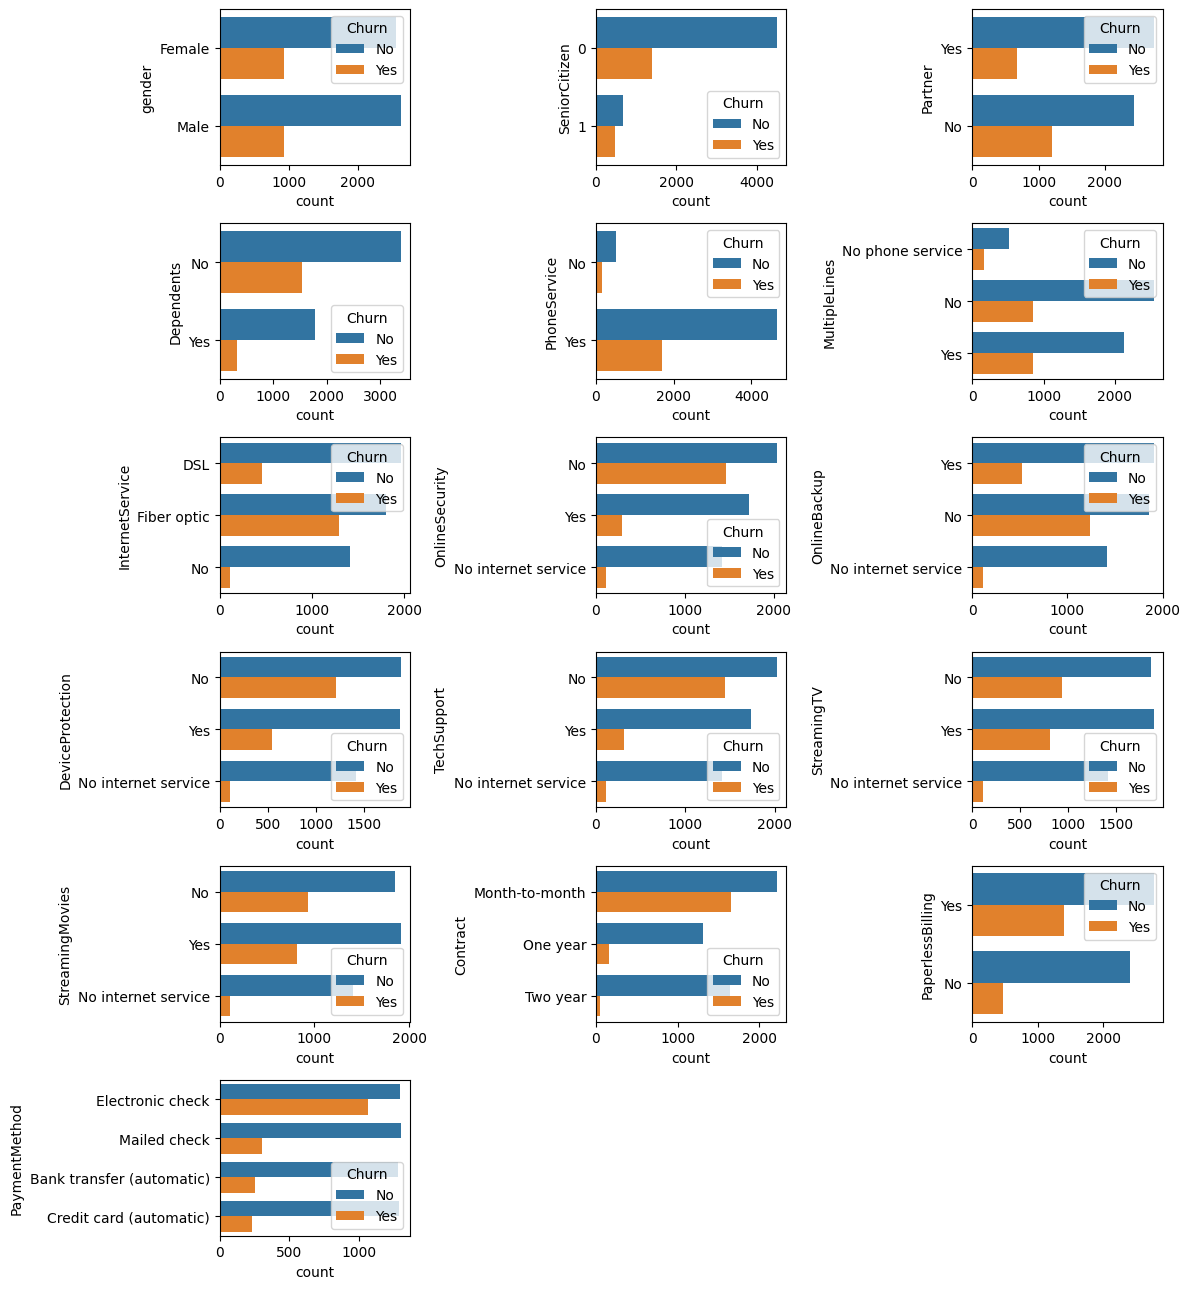

In [ ]:
plt.figure(figsize=(12,13))
for i in range(0,len(cats)):
  plt.subplot(6,3,i+1)
  sns.countplot(y=df[cats[i]], hue=df['Churn'] ,orient='v')
plt.tight_layout()

Dapat ditarik beberapa insight seperti pada kolom SeniorCitizen, warga negara yang senior lebih tinggi persentasenya untuk churn dibandingkan yang milenial.Pada kolom contract , yang month to month lebih tinggi persentase nya untuk churn dibandingkan one year dan two year

<Axes: >

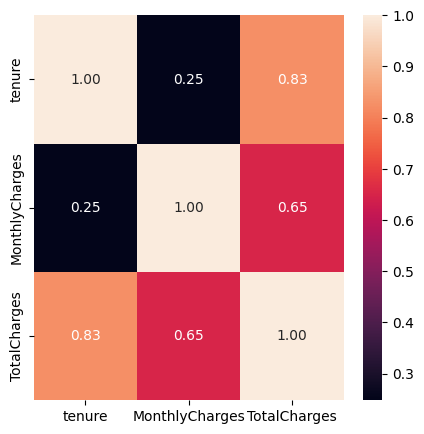

In [ ]:
plt.figure(figsize=(5,5))
#membuat heatmap untuk mengetahui korelasi antar variabel
#menggunakan annot untuk memunculkan angka
#menggunakan fmt untuk menentukan format penulisan angka
sns.heatmap(df.corr(), annot=True,fmt=".2f")

Dapat ditarik beberapa insight seperti korelasi antara total charges dan tenure adalah high positive correlation artinya semakin lama orang tersebut dalam perusahaan maka semakin besar pula total charges yang dikeluarkan.

In [ ]:
#data categories dapat dibuat heatmap dengan mengubah menjadi numerik
#memanggil df cats
df[cats].head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [ ]:
#Melakukan one hot encoding untuk mengubah data categorc menjadi numeric
df2=pd.get_dummies(df,drop_first=True)

In [ ]:
df2.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,1,29.85,29.85,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,34,56.95,1889.50,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,2,53.85,108.15,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
3,45,42.30,1840.75,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1


<Axes: >

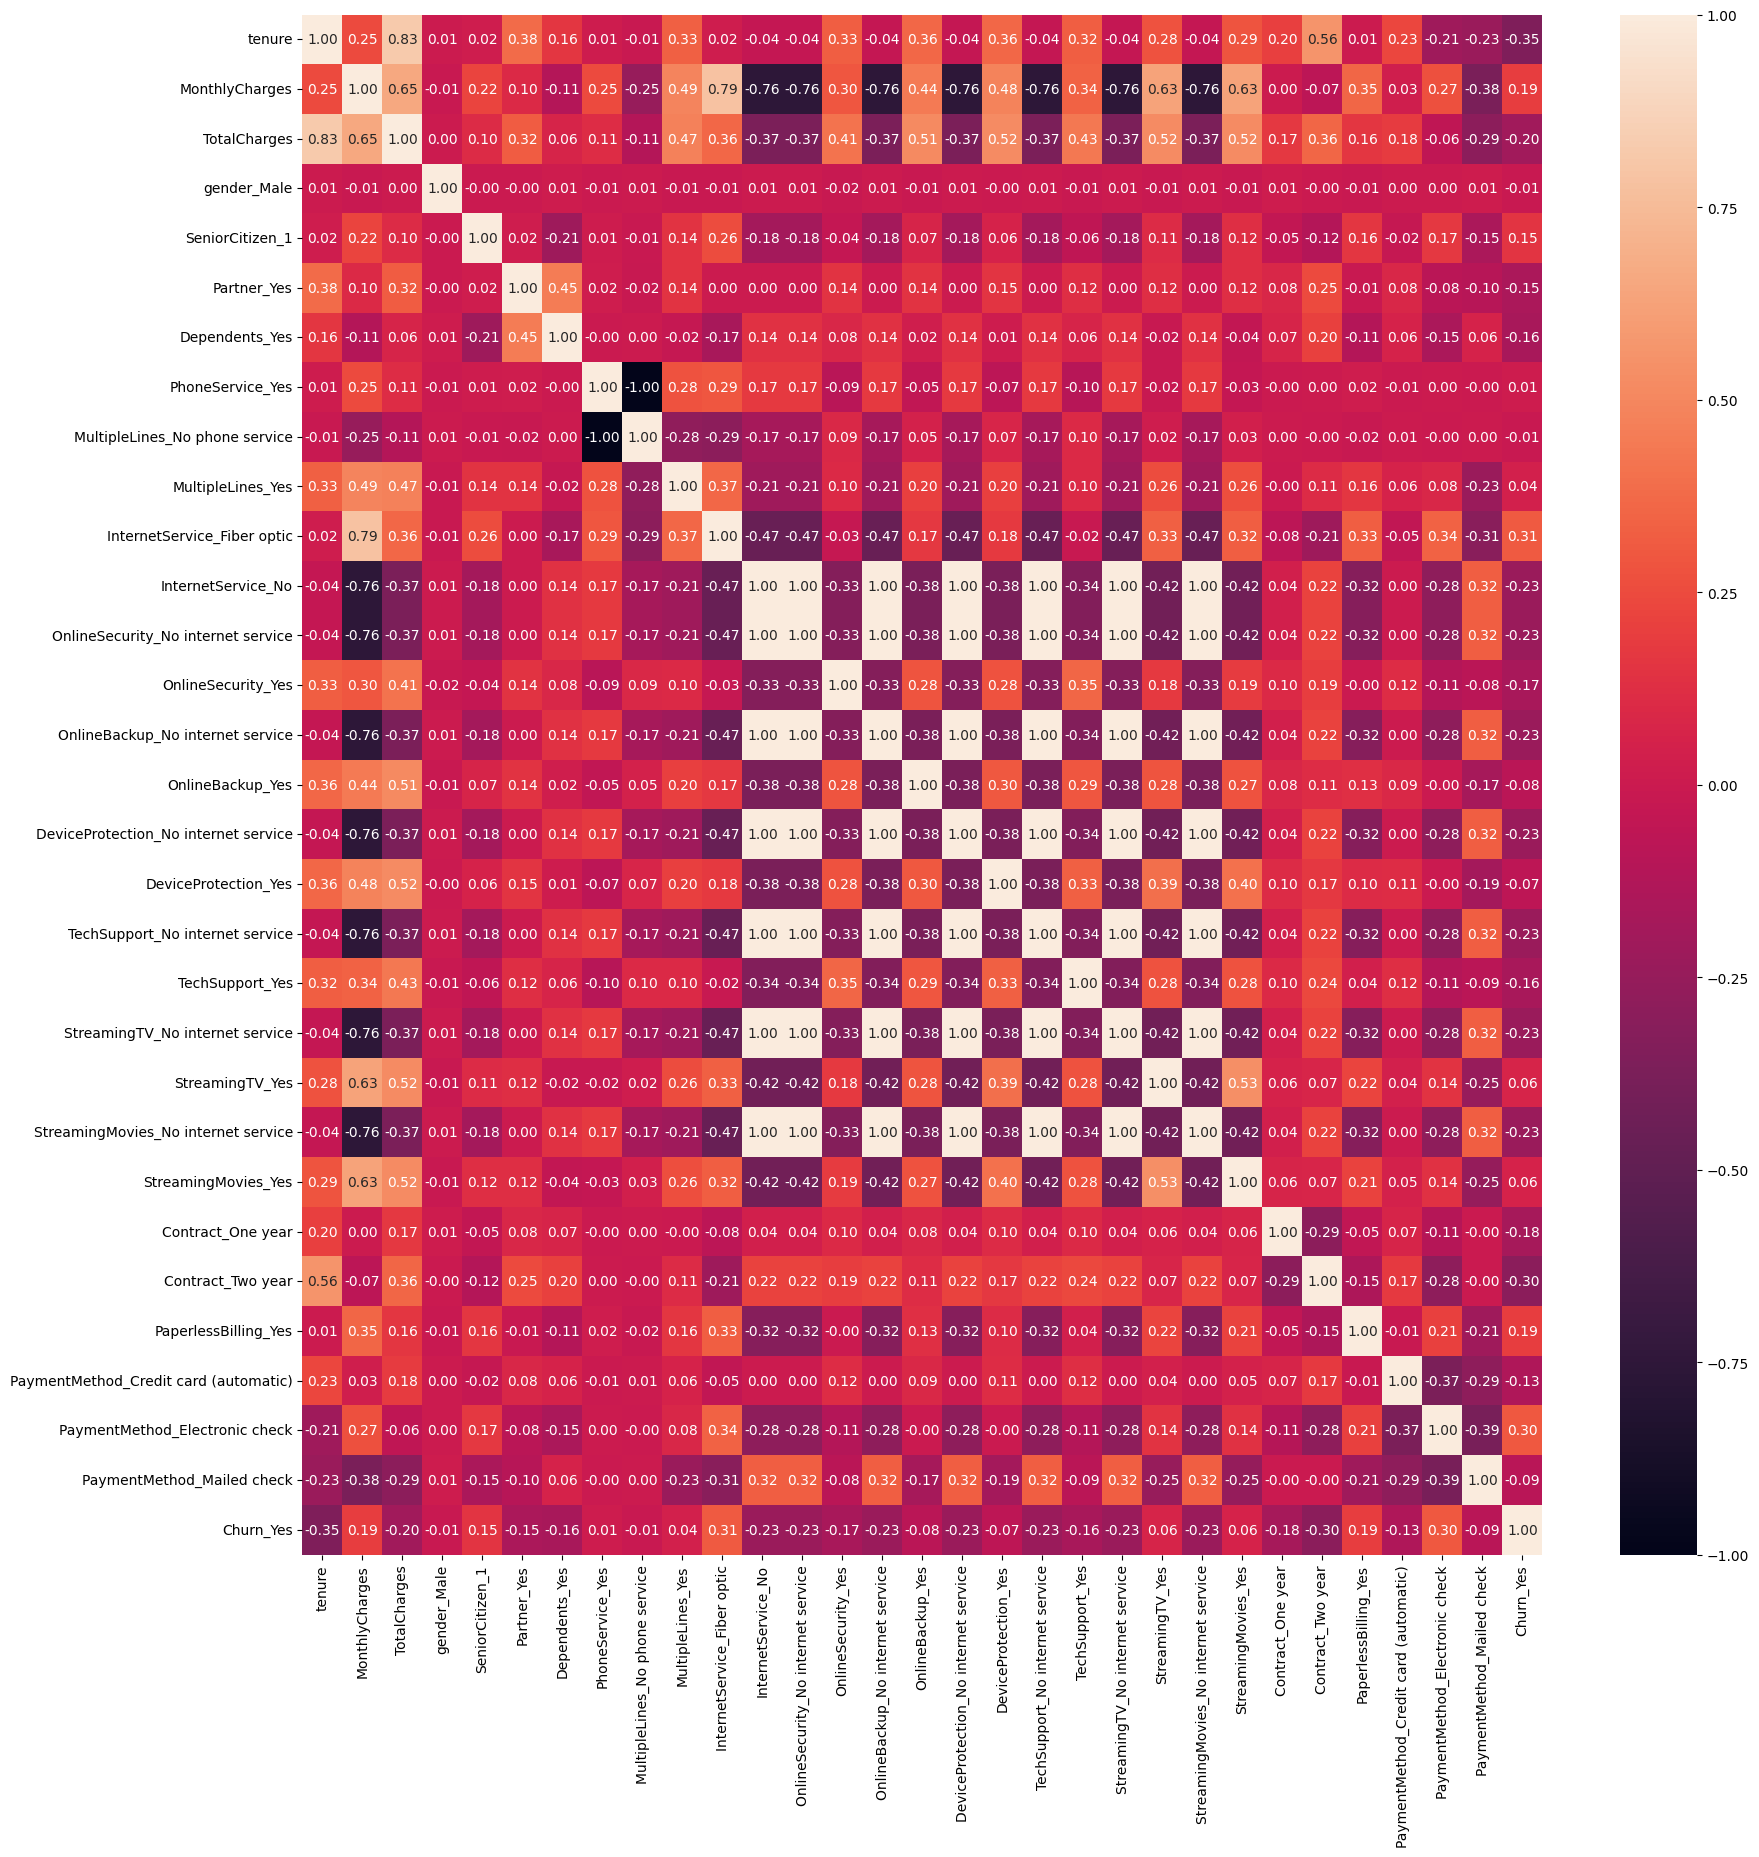

In [ ]:
#Membuat heatmap


Dapat ditarik beberapa insight seperti:

- Korelasi antara tenure dengan Churn_Yes adalah negative correlation artinya semakin tinggi tenure maka semakin rendah kemungkinan churn

- Korelasi antara Churn_Yes dengan monthly charges adalah positive correlation artinya semakin tinggi monthly charges yang dikeluarkan maka semakin tinggi pula kemungkinan untuk churn

dsb

In [ ]:
#Karena fokus kita pada kemungkinan churn atau tidak, maka korelasi antara Churn_Yes dengan variabel lainnya dapat diketahui dengan df2.corr()['Churn_Yes']
#Ini memunculkan korelasi antara Churn_Yes dengan var lainnya dalam bentuk bukan map
df2.corr()['Churn_Yes']

tenure                                  -0.352229
MonthlyCharges                           0.193356
TotalCharges                            -0.199484
gender_Male                             -0.008612
SeniorCitizen_1                          0.150889
Partner_Yes                             -0.150448
Dependents_Yes                          -0.164221
PhoneService_Yes                         0.011942
MultipleLines_No phone service          -0.011942
MultipleLines_Yes                        0.040102
InternetService_Fiber optic              0.308020
InternetService_No                      -0.227890
OnlineSecurity_No internet service      -0.227890
OnlineSecurity_Yes                      -0.171226
OnlineBackup_No internet service        -0.227890
OnlineBackup_Yes                        -0.082255
DeviceProtection_No internet service    -0.227890
DeviceProtection_Yes                    -0.066160
TechSupport_No internet service         -0.227890
TechSupport_Yes                         -0.164674


##Category plot

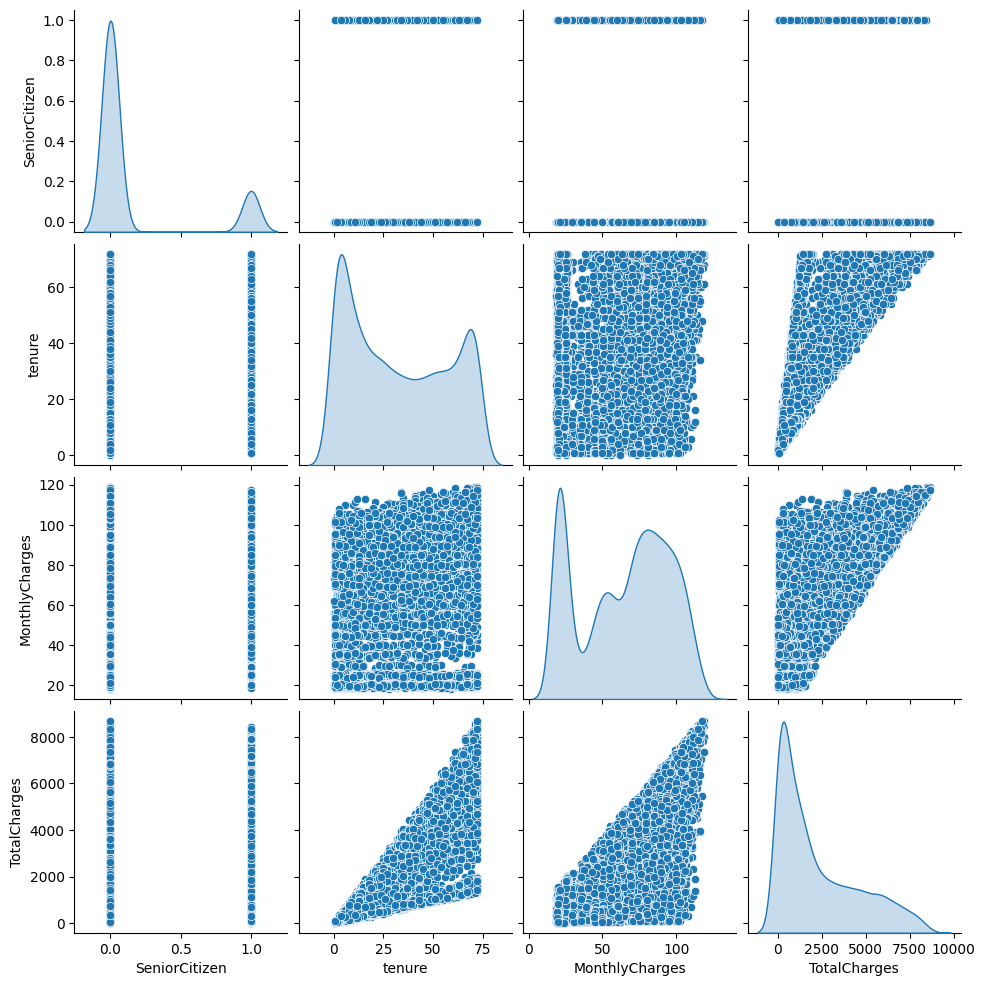

In [ ]:
sns.pairplot(df, diag_kind='kde')

**Berdasarkan grafik scatterplot tersebut, dapat disimpulkan bahwa:**
- Grafik pada data "SeniorCitizen" tidak membentuk grafik yang jelas dan tidak membentuk pola, dikarenakan hanya terdapat 2 value saja yaitu 0 dan 1
- Grafik pada data "tenure", "MonthlyCharges" dan "TotalCharges" membentuk pola yang jelas
- Grafik data "tenure" terhadap "TotalCharges" membentuk pola ke kanan sehingga menciptakan hubungan yang positif. Sedangkan data "tenure" terhadap "MonthlyCharges" membentuk pola yang tersebar di tengah sehingga korelasi rendah dan hampir tidak memiliki korelasi
- Grafik data "MonthlyCharges" terhadap "TotalCharges" membentuk pola ke kanan sehingga menciptakan hubungan yang positif
- Grafik data "TotalCharges" terhadap "MonthlyCharges" membentuk pola ke kanan sehingga menciptakan hubungan yang positif. Dimana jika variabel 1 mengalami peningkatan, maka diikuti peningkatan oleh variabel 2 dan sebaliknya